In [1]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0  38741      0 --:--:-- --:--:-- --:--:-- 38816']

In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


In [3]:
import math
import itertools
import re

# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance):
            continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]

    return data


def dot_product(array1, array2):
    #Returns the dot product of two arrays.
    return sum(a * b for a, b in zip(array1, array2))


def sigmoid(x):
    #Returns the sigmoid function applied to x.
    return 1 / (1 + math.exp(-x))


def output(weights, instance):
    #Returns the output of the perceptron model.
    return sigmoid(dot_product(weights, instance))


def predict(weights, instance):
    #Predicts the label of an instance.
    return 1 if output(weights, instance) >= 0.5 else 0


def get_accuracy(weights, instances):
    #Computes accuracy as the percentage of correct predictions.
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


def train_perceptron(instances, lr, epochs):
    #Trains a perceptron with given instances and hyperparameters.
    # Initialize weights (including bias) to zero
    weights = [0] * (len(instances[0]) - 1)

    for _ in range(epochs):
        for instance in instances:
            # Compute input
            in_value = dot_product(weights, instance)
            # Compute output
            out = sigmoid(in_value)
            # Compute error
            error = instance[-1] - out
            # Update weights using gradient descent
            for i in range(len(weights)):
                weights[i] += lr * error * out * (1 - out) * instance[i]

    return weights


## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




The sigmoid function is used in training because it provides a differentiable output needed for gradient-based updates. The predict function applies a threshold (>= 0.5) to make binary decisions thus preventing proper weight updates. So often sigmoid is used within the training and predict is used after training, to make final predicitons.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [5]:
import numpy as np

# Define hyperparameter grids
tr_percent = [5, 10, 25, 50, 75, 100]
num_epochs = [5, 10, 20, 50, 100]
lr_array = [0.005, 0.01, 0.05]

# Store accuracy results
accuracy_results = {}  # Dictionary to store accuracy values for different hyperparameter combinations

# Load datasets
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

# Train and evaluate perceptron
for lr in lr_array:
    for tr_size in tr_percent:
        size = round(len(instances_tr) * tr_size / 100)  # Compute subset size
        pre_instances = instances_tr[:size]  # Select training subset

        for epochs in num_epochs:
            weights = train_perceptron(pre_instances, lr, epochs)  # Train model
            accuracy = get_accuracy(weights, instances_te)  # Evaluate on test set

            # Store accuracy in dictionary
            accuracy_results[(tr_size, epochs, lr)] = accuracy

            # Print output after each training run
            print(f"# tr: {size:3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
# tr:  40, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  40, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  40, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  40, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 100, epoch

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



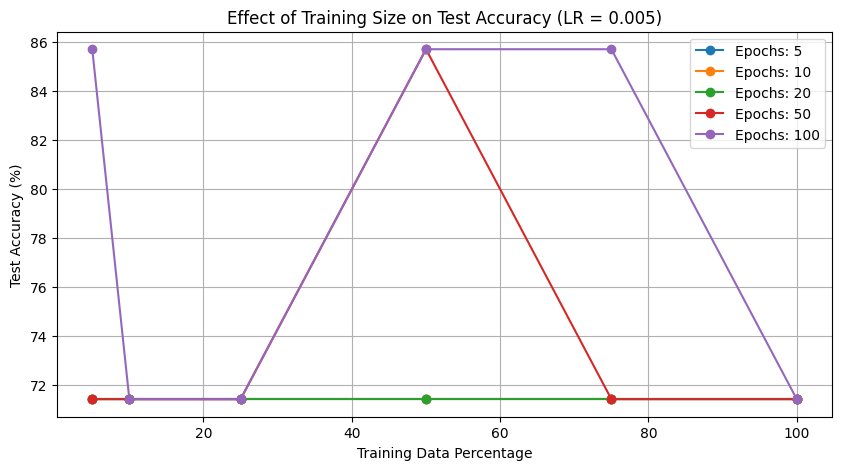

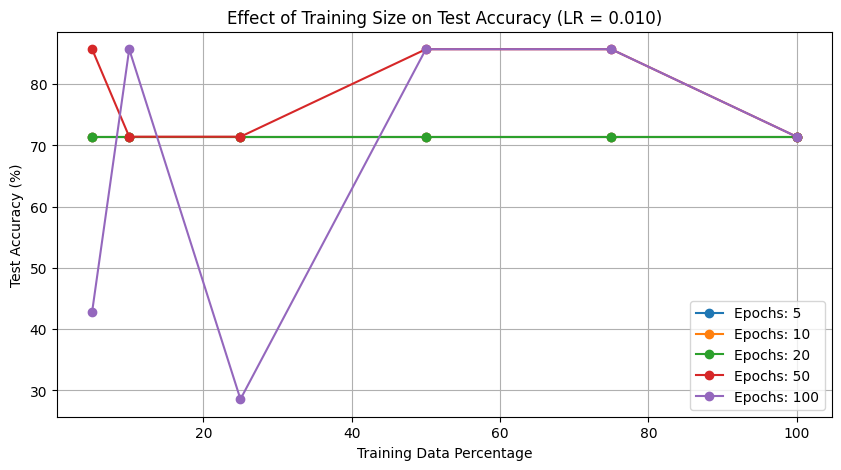

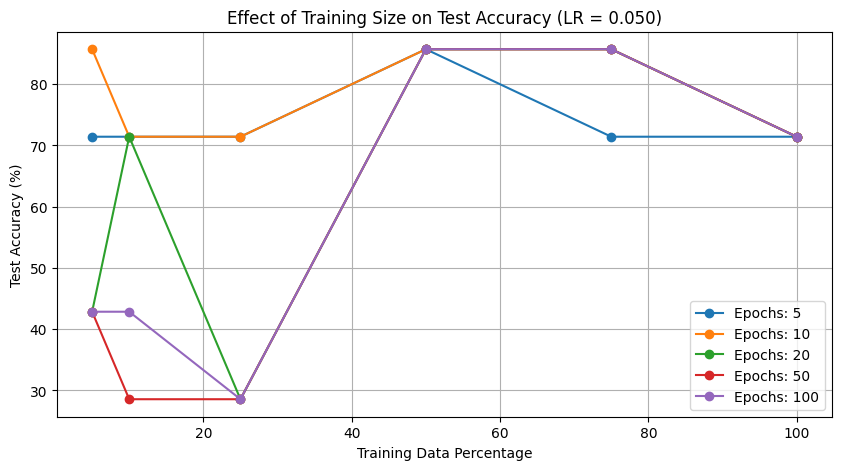

In [6]:
import matplotlib.pyplot as plt
# ---- Plot: Accuracy vs. Training Size for each Learning Rate ----
for lr in lr_array:
    plt.figure(figsize=(10, 5))

    # Iterate through different epoch values
    for epochs in num_epochs:
        accuracies = [accuracy_results[(tr, epochs, lr)] for tr in tr_percent]  # Fix learning rate
        plt.plot(tr_percent, accuracies, marker='o', label=f'Epochs: {epochs}')

    plt.xlabel('Training Data Percentage')
    plt.ylabel('Test Accuracy (%)')
    plt.title(f'Effect of Training Size on Test Accuracy (LR = {lr:.3f})')
    plt.legend()
    plt.grid()
    plt.show()


A. Not necessarily. While increasing the training data size generally improves performance, it does not always lead to the highest accuracy. In few cases, training with a smaller subset of data might be sufficient for the model to generalize well. As overfitting may occur if the model trains on the larger dataset by memorizing noise instead of learning general patterns, which may prevent the model from generalizing thus decreasing test accuracy. This can be obsereved in the otput of the second question and can be visualized from the above plots.

B. This discrepancy can be explained by the different learning rates in both cases. In the first case, a higher learning rate (0.050) led to faster convergence, whereas in the second case, a lower learning rate (0.005) might have caused the model to update weights too slowly, getting stuck in a suboptimal solution. Also, using more training data can increase model complexity, which might also cause overfitting.

C. Yes, potentially. Introducing additional optimizations, such as adaptive learning rates, weight regularization (L1/L2), or feature selection techniques, could improve accuracy beyond 80%. Moreover, non-linearity in the dataset may limit the perceptron’s effectiveness, so kernel-based transformations (e.g., RBF kernel) or using multi-layer perceptrons (MLPs) could further boost performance.

D. Not always. At the beginning increasing epochs helps, but after a certain threshold, the model might start overfitting as all other hyperparameters are fixed. If the accuracy stops improving or fluctuates after many epochs, early stopping or learning rate decay should be used to prevent unnecessary training and computational cost. The same can be observed in the above 5 plots as well as the output of Question 2.